# **1. Configuration du début de code**

In [ ]:
import pandas as pd
import os

FILE_PATH = "en.openfoodfacts.org.products.csv"

CHUNK_SIZE = 10000
NUTRISCORE_GRADE =  ["a", "b", "c", "d", "e"]
COLS_TARGET = ['nutriscore_grade']
SEUIL_VALEURS_VIDES=20
OUTPUT_PATH = "openfoodfact_clean.csv"
OUTPUT_AFTER_CHUNK_PATH = "openfoodfact_after_chunk.csv"
UNKNOWN_COUTRY = "unknown"
COL_FOR_COUNTRY = "countries_en"

# **2. Récupération des données**

In [ ]:
chunks = pd.read_csv(FILE_PATH, sep="\t", low_memory=False, header=0, chunksize=CHUNK_SIZE, on_bad_lines="skip")
list_df = []
for chunk in chunks:
  list_df.append(chunk)

# 3. **Actions de nettoyage**

### a. Nettoyer le nutriscore_grade

In [ ]:
list_df_notna = []

for df in list_df:
  df_tmp = df[df[COLS_TARGET].notna().all(axis=1)]
  if len(df_tmp) > 0:
    list_df_notna.append(df_tmp)

    # Cette ne sera sûrement pas nécéssaire car il reste encore plus de 3 millions d'entrée.
    # Lors de la création du script passer directement à la partie b

In [ ]:
# On supprime les lignes qui sont en dehors des nutriscore a, b, c, d, e
list_df_in_grade = []

for df in list_df_notna:
    df_tmp = df[df["nutriscore_grade"].isin(NUTRISCORE_GRADE)]
    if len(df_tmp) > 0:
        list_df_in_grade.append(df_tmp)

In [ ]:
# On vérifie le nombre de lignes qui nous reste à la fin

n_rows = 0
for df in list_df_in_grade:
    n_rows += len(df)

n_rows

1156038

In [ ]:
# Je fusionne la liste de Dataframe en Dataframe car c'est maintenant possible de le faire
df_clean = pd.concat(list_df_in_grade, ignore_index=False)

### b. Suppression des colonnes selon des pourcentages rempli

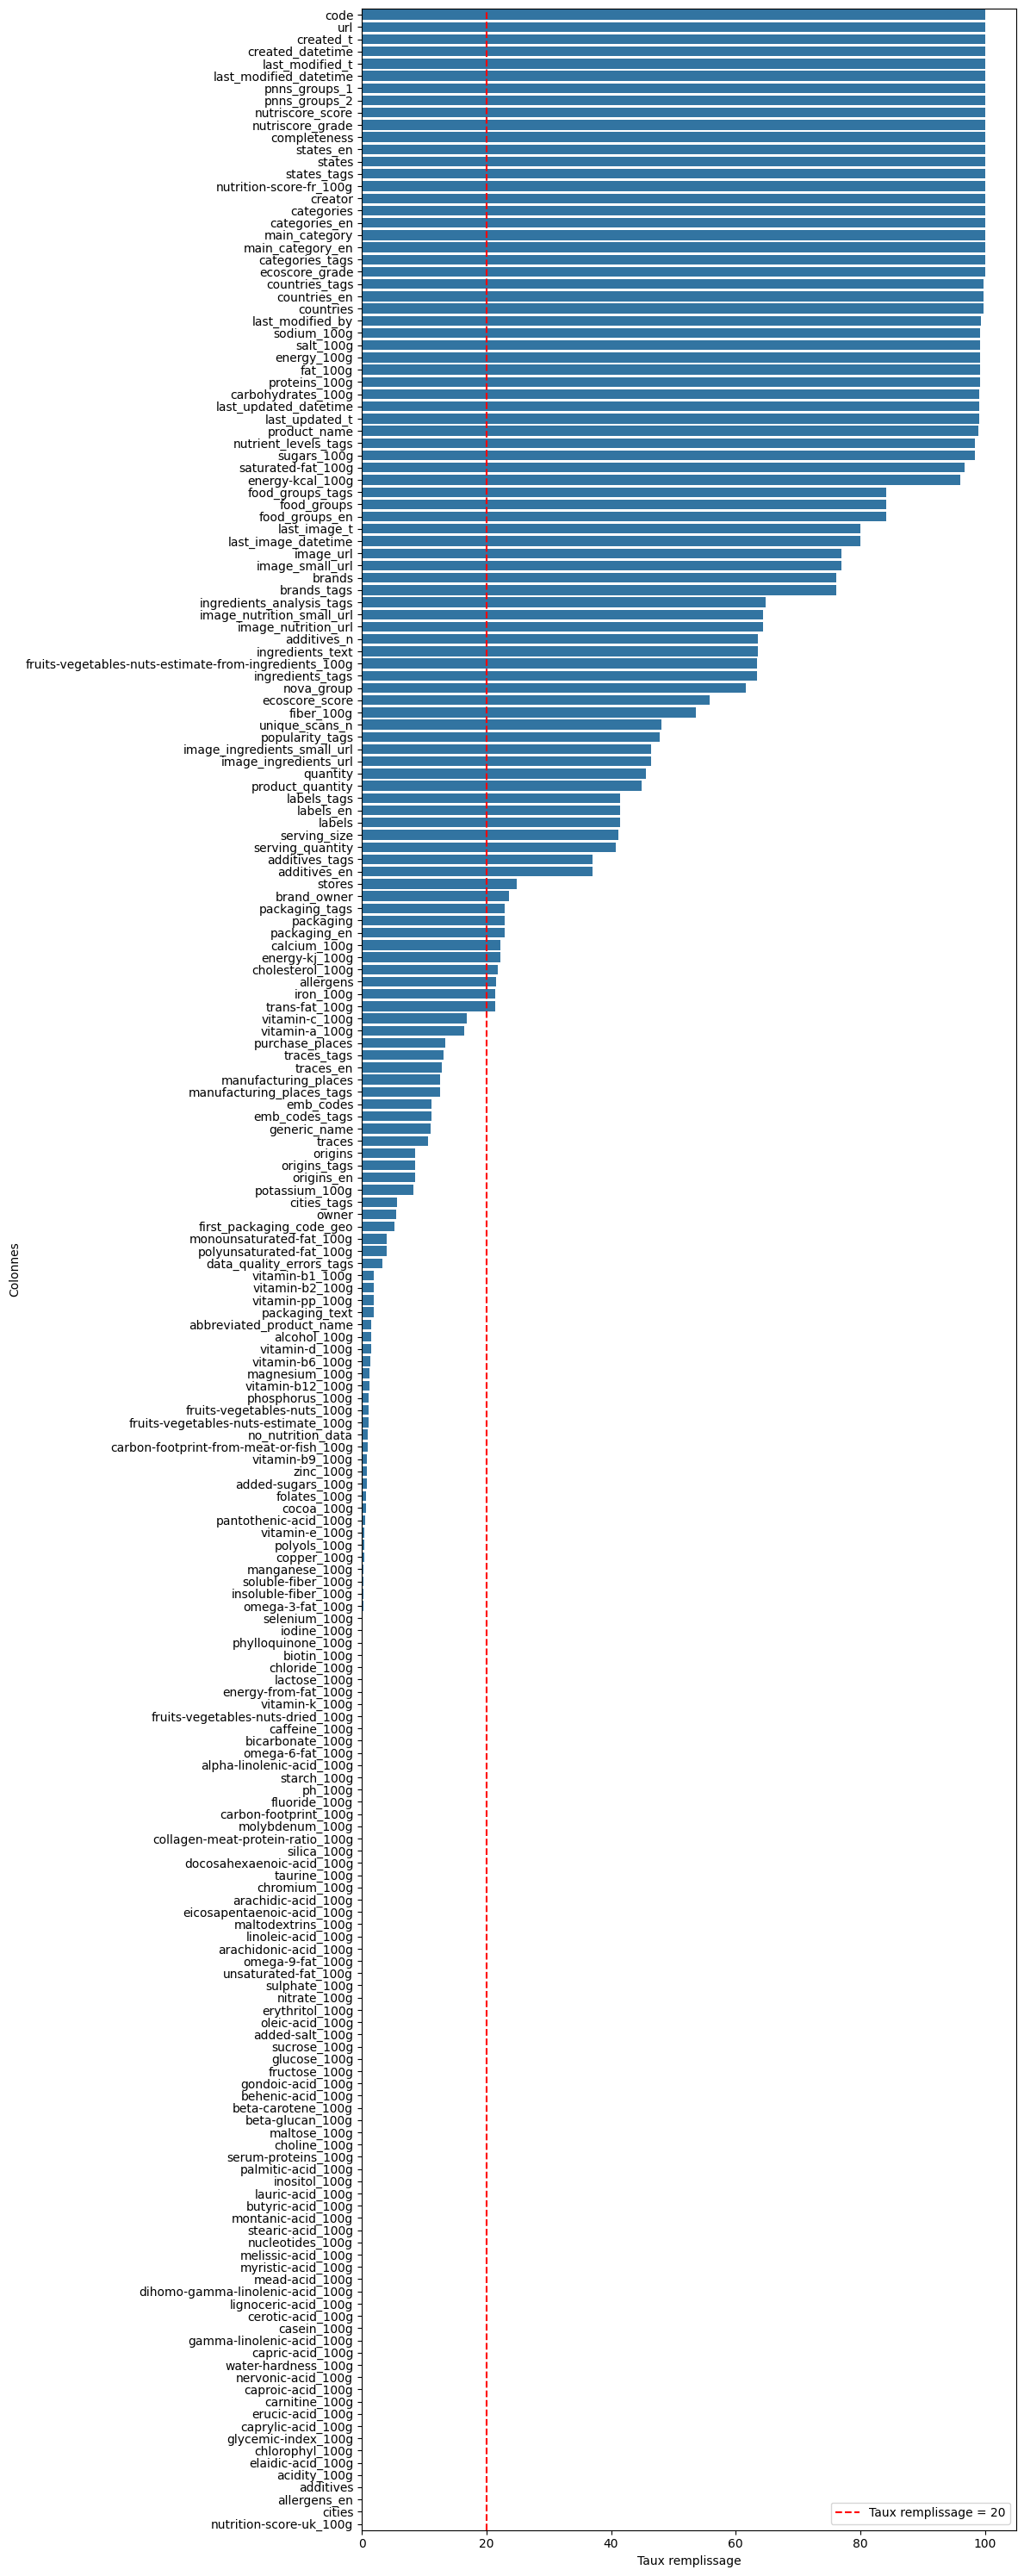

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculer le taux de remplissage pour chaque colonne
valeurs = df_clean.notnull().mean() * 100
colonnes = df_clean.columns.astype(str)

# Créer un DataFrame pour le taux de remplissage
df_remplissage = pd.DataFrame({'Colonnes': colonnes, 'Taux remplissage': valeurs.values})

# Trier le DataFrame par taux de remplissage
df_sorted = df_remplissage.sort_values(by='Taux remplissage', ascending=False).reset_index(drop=True)

# Créer le graphique
plt.figure(figsize=(12, 30))  # Taille de la figure
sns.barplot(x='Taux remplissage', y='Colonnes', data=df_sorted, orient='h')
plt.axvline(x=SEUIL_VALEURS_VIDES, color='red', linestyle='--', label=f'Taux remplissage = {SEUIL_VALEURS_VIDES}')

# Afficher la légende et le graphique
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Stocker le taux de valeurs vides de chaque colonne directement dans un DataFrame
taux_remplissage_columns = df_clean.isnull().mean() * 100

# Créer un DataFrame des colonnes et du taux de valeurs vides
df_colonnes = pd.DataFrame({
    'Colonnes': df_clean.columns,
    'Taux valeurs vides': taux_remplissage_columns
})

# Sélectionner les colonnes dont le taux de valeurs vides est supérieur au seuil
empty_columns = df_colonnes.loc[df_colonnes['Taux valeurs vides'] > (100 - SEUIL_VALEURS_VIDES), 'Colonnes']

# Supprimer les colonnes identifiées
df_clean.drop(empty_columns, axis=1, inplace=True)

# Afficher les premières lignes du DataFrame nettoyé
df_clean.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,1,http://world-en.openfoodfacts.org/product/0000...,inf,1634745456,2021-10-20T15:57:36Z,1729416368,2024-10-20T09:26:08Z,kris3,1.729416e+09,2024-10-20T09:26:08Z,...,6.70000,6.70000,NaN,80.000000,0.500000,0.200000,NaN,NaN,0.013317,12.0
3,4,http://world-en.openfoodfacts.org/product/0000...,elcoco,1560176426,2019-06-10T14:20:26Z,1728909934,2024-10-14T12:45:34Z,smoothie-app,1.728910e+09,2024-10-14T12:45:34Z,...,40.70000,35.00000,8.400000,7.500000,0.000000,0.000000,NaN,NaN,12.000000,19.0
4,5,http://world-en.openfoodfacts.org/product/0000...,touchette,1605337720,2020-11-14T07:08:40Z,1729432954,2024-10-20T14:02:34Z,roboto-app,1.729433e+09,2024-10-20T14:02:34Z,...,8.00000,8.00000,88.000000,0.000000,0.230000,0.092000,NaN,NaN,50.000000,-2.0
5,6,http://world-en.openfoodfacts.org/product/0000...,rigione,1541625386,2018-11-07T21:16:26Z,1729267932,2024-10-18T16:12:12Z,maldan,1.729268e+09,2024-10-18T16:12:12Z,...,9.60000,2.20000,1.300000,5.700000,1.181102,0.472441,NaN,NaN,0.000000,17.0
7,8,http://world-en.openfoodfacts.org/product/0000...,halal-app-chakib,1609862762,2021-01-05T16:06:02Z,1728918006,2024-10-14T15:00:06Z,maldan,1.728918e+09,2024-10-14T15:00:06Z,...,46.42857,28.57143,10.714286,10.714286,0.089286,0.035714,0.178571,0.008929,NaN,15.0


### c. Suppressions des lignes tous les nutriments sont vides

In [ ]:
# Sélectionner les colonnes contenant "_100g" (colonnes des nutriments)
nutrients_columns = [col for col in df_clean.columns if "_100g" in col]

# Filtrer les lignes où au moins une colonne de nutrients_columns n'est pas vide
df_clean_empty_nutrients = df_clean.dropna(subset=nutrients_columns, how='all')


### d. Suppressions des lignes doublons selon les marques et produits

In [ ]:
df_tmp = df_clean.sort_values(by='last_modified_datetime')
df_drop_duplicates = df_tmp.drop_duplicates(subset=['brands', 'product_name'], keep='last')

In [ ]:
 # Calcule du nombre de lignes après drop duplicated
len(df_drop_duplicates)

983035

In [ ]:
# On l'associe pour la suite
df_clean = df_drop_duplicates

### e. suppressions des variables redondantes (_tags , _en)

In [ ]:
import re

# Filtrer uniquement les colonnes contenant '_en' ou '_tag'
filtered_columns = df_clean.filter(regex='_en|_tag')

# Récupérer les noms des colonnes filtrées
filtered_column_names = filtered_columns.columns.tolist()
column_names = df_clean.columns

# print(filtered_column_names)

extracted_terms_list = list()
for col in column_names:
    if (col+"_en" in filtered_column_names) or (col+"_tags" in filtered_column_names):
        extracted_terms_list.append(col)  # Ajouter la partie avant le suffixe

column_to_drop = filtered_column_names+extracted_terms_list
print(column_to_drop)

# Je vais laisser tomber pour l'instant
# Dans l'esprit, on va comparer par rapport à _en et _tag et rien celui qui a plus valeur. Celui qui le plus de valeur
# on le garde donc on retourne ceux à supprimer dans une liste puis on fait un drop des colonnes




['packaging_tags', 'packaging_en', 'brands_tags', 'categories_tags', 'categories_en', 'labels_tags', 'labels_en', 'countries_tags', 'countries_en', 'ingredients_tags', 'ingredients_analysis_tags', 'additives_tags', 'additives_en', 'food_groups_tags', 'food_groups_en', 'states_tags', 'states_en', 'nutrient_levels_tags', 'popularity_tags', 'main_category_en', 'packaging', 'brands', 'categories', 'labels', 'countries', 'food_groups', 'states', 'main_category']


**Pour éviter de refaire ce putain de chunk je créer un fichier CSV**

In [ ]:
# Exporter en CSV avec un séparateur de tabulation (\t)
df_clean.to_csv(OUTPUT_AFTER_CHUNK_PATH, sep='\t', index=False)

# 4. Graphique

 ### a. Import matplolib

In [ ]:

df_clean[df_clean["calcium_100g"] > 100][col_nutri].describe()



,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,51.000000,51.000000,14.000000,16.000000,51.000000,51.000000,40.000000,51.000000,51.000000,51.000000,51.000000,15.000000,38.000000
mean,10.469742,5.360480,0.206000,11.715082,13.895818,7.010571,2.704387,8.804986,4.705461,1.882619,231.764706,1.496000,12.422390
std,12.082032,6.659666,0.387117,24.074636,16.942828,10.255342,5.601311,7.802949,15.951771,6.380989,161.443685,1.923493,27.041731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,103.000000,0.000000,0.000000
25%,1.850000,0.950000,0.000000,0.006240,3.335714,0.353846,0.000000,3.300000,0.095000,0.038000,120.000000,0.080500,0.000000
50%,3.800000,2.300000,0.000000,0.022500,7.900000,3.571429,0.000000,5.000000,0.153900,0.061560,159.000000,0.599000,0.000000
75%,18.350000,7.000000,0.225000,5.062475,13.500000,9.750000,2.025000,13.000000,1.458929,0.583571,288.000000,2.250000,12.256931
max,50.000000,21.200000,1.250000,83.300000,66.700000,41.800000,21.700000,33.300000,87.500000,35.000000,745.000000,6.670000,100.000000


In [ ]:
import matplotlib.pyplot as plt

df_output = pd.read_csv(OUTPUT_AFTER_CHUNK_PATH, sep="\t", low_memory=False, header=0, on_bad_lines="skip")
df_output.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,7622300786748,http://world-en.openfoodfacts.org/product/7622...,jcnascimento,1370883363,2013-06-10T16:56:03Z,1372013804,2013-06-23T18:56:44Z,jcnascimento,1.707588e+09,2024-02-10T18:05:27Z,...,60.9,60.9,0.0,6.09,0.353,0.1410,NaN,NaN,0.000000,27.0
1,7622300811693,http://world-en.openfoodfacts.org/product/7622...,jcnascimento,1372013012,2013-06-23T18:43:32Z,1372109503,2013-06-24T21:31:43Z,jcnascimento,1.707588e+09,2024-02-10T18:05:36Z,...,64.0,52.0,2.4,6.40,0.559,0.2240,NaN,NaN,0.011597,26.0
2,7894321216324,http://world-en.openfoodfacts.org/product/7894...,jcnascimento,1372376585,2013-06-27T23:43:05Z,1372822728,2013-07-03T03:38:48Z,jcnascimento,1.707589e+09,2024-02-10T18:12:41Z,...,60.0,25.0,9.0,6.75,0.241,0.0965,NaN,NaN,0.000000,8.0
3,5400197212487,http://world-en.openfoodfacts.org/product/5400...,pamputt,1410198394,2014-09-08T17:46:34Z,1410200235,2014-09-08T18:17:15Z,pamputt,1.707579e+09,2024-02-10T15:26:13Z,...,13.3,3.3,6.7,10.00,0.000,0.0000,NaN,NaN,100.000000,-1.0
4,2114296007556,http://world-en.openfoodfacts.org/product/2114...,emerycm,1408358882,2014-08-18T10:48:02Z,1411018866,2014-09-18T05:41:06Z,emerycm,1.707525e+09,2024-02-10T00:26:54Z,...,1.0,1.0,0.5,17.00,2.286,0.9144,NaN,NaN,0.000000,24.0


### b. Création des produits par années (bargraph)

In [ ]:
# Split la colonne date de création du produit par années
def get_year(date):
    result = None
    if "-" in date:
        result = date.split("-")[0]
    elif "/" in date:
        result = date.split("/")[0]
    return int(result)

years = df_output["created_datetime"].apply(get_year)
df_output["year"] = years

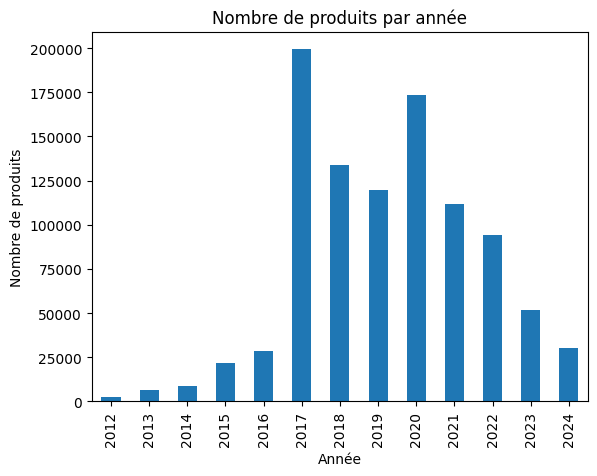

In [ ]:
# Regrouper par année et compter le nombre de produits
product_count_by_year = df_output.groupby('year').size()

# Créer un graphique en barres
product_count_by_year.plot(kind='bar')

# Ajouter des titres et labels
plt.title('Nombre de produits par année')
plt.xlabel('Année')
plt.ylabel('Nombre de produits')

# Afficher le graphique
plt.show()

### c. Tableau de répartition par Pays

In [ ]:
import pycountry

# 1. Spliter les pays dans la colonne 'countries_en'
df_country_output = df_output
df_country_output['countries_en'] = df_country_output['countries_en'].fillna(UNKNOWN_COUTRY)
# 2. Vérifier et spliter seulement les chaînes de caractères
df_country_output['country_clean'] = df_country_output['countries_en'].apply(
    lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else x
)

# Fonction pour vérifier si un pays est valide
def is_valid_country(country):
    try:
        if pycountry.countries.lookup(country.strip()):
            return True
    except LookupError:
        return False

# Afficher le résultat
df_country_output = df_country_output.explode('country_clean')

# Nettoyer les pays et remplacer les non valides par "unknown"
df_country_output['country_clean'] = df_country_output['country_clean'].apply(lambda x: x if is_valid_country(x) else 'unknown')



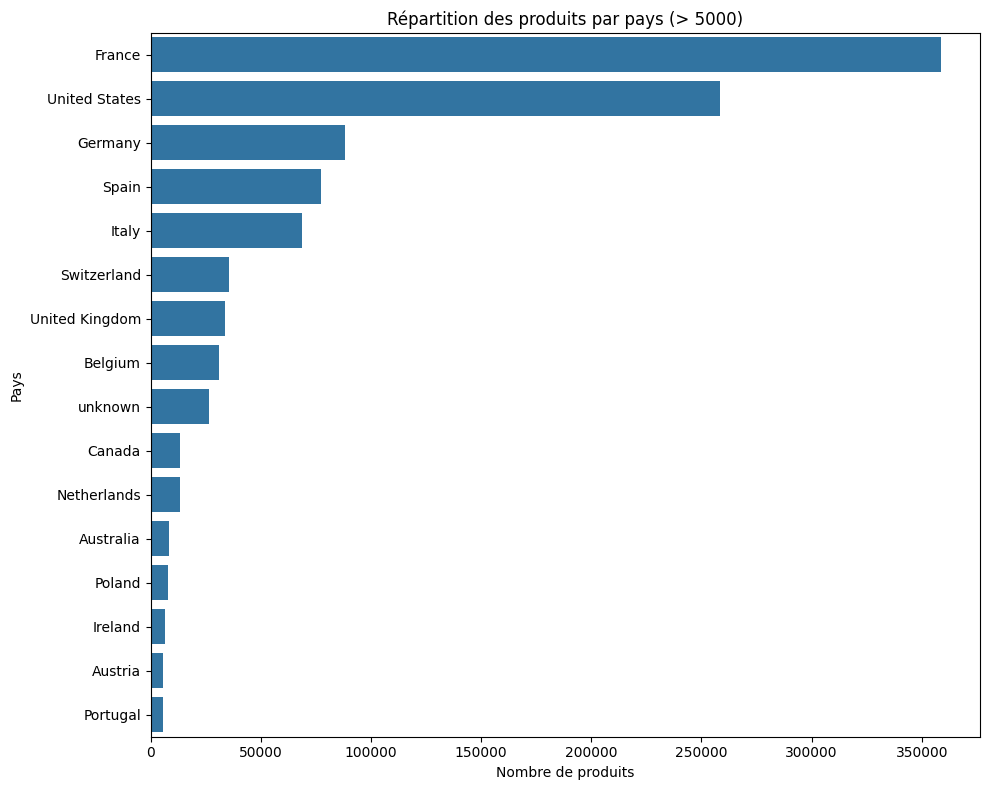

In [ ]:
import seaborn as sns

LIMIT_PRODUIT = 5000

# Compter le nombre de produits par pays
country_product_count = df_country_output.groupby('country_clean')["country_clean"].count().sort_values(ascending=False)

# Filtrer pour n'afficher que les pays avec au moins un produit (> 0)
country_product_count = country_product_count[country_product_count > LIMIT_PRODUIT] # A moins de LIMIT_PRODUIT Il y aura trop pays

# Convertir en DataFrame pour l'utilisation avec seaborn
df_country = country_product_count.reset_index(name='Nombre de produits')

# Définir la taille du graphique en fonction du nombre de pays
num_countries = len(df_country)
plt.figure(figsize=(10, num_countries * 0.5))  # Ajuster la hauteur par nombre de pays
sns.barplot(y='country_clean', x='Nombre de produits', data=df_country)

# Ajouter des labels et un titre
plt.title(f'Répartition des produits par pays (> {LIMIT_PRODUIT})')
plt.ylabel('Pays')
plt.xlabel('Nombre de produits')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud

df_category_output = df_output
df_category_output[['categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']] = df_category_output[['categories_en', 'pnns_groups_1', 'pnns_groups_2', 'main_category_en']].fillna('unknown').replace('', 'unknown')

# Diviser les colonnes qui contiennent plusieurs catégories (en supposant une séparation par virgule)
df_category_output['categories_en'] = df_category_output['categories_en'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_category_output['pnns_groups_1'] = df_category_output['pnns_groups_1'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_category_output['pnns_groups_2'] = df_category_output['pnns_groups_2'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_category_output['main_category_en'] = df_category_output['main_category_en'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Créer de nouvelles lignes pour chaque catégorie dans les colonnes avec plusieurs valeurs
df_category_output = df_category_output.explode('categories_en').explode('pnns_groups_1').explode('pnns_groups_2').explode('main_category_en')

# Supposons que df soit votre DataFrame après nettoyage
# Combiner les valeurs des colonnes en une seule chaîne de texte
text = ' '.join(df_category_output['categories_en'].astype(str)) + ' ' + \
       ' '.join(df_category_output['pnns_groups_1'].astype(str)) + ' ' + \
       ' '.join(df_category_output['pnns_groups_2'].astype(str)) + ' ' + \
       ' '.join(df_category_output['main_category_en'].astype(str))

# Créer le WordCloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)

# Créer un barplot avec Seaborn
plt.figure(figsize=(14, 6))

# Première sous-figure : WordCloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Désactiver les axes
plt.title('WordCloud des Catégories')

# Deuxième sous-figure : Un bar chart Seaborn
plt.subplot(1, 2, 2)
sns.countplot(y='main_category_en', data=df_category_output, order=df_category_output['main_category_en'].value_counts().index)
plt.title('Nombre de produits par catégorie principale')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégories')

plt.tight_layout()
plt.show()

## 5. Analyse _100g

### a. df.describe()

In [ ]:
[col for col in df_output.columns if "_100g" in col and col != 'nutrition-score-fr_100g']

['energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'calcium_100g',
 'iron_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

In [ ]:
column_100g = [col for col in df_output.columns if "_100g" in col and col != 'nutrition-score-fr_100g']
df_output_100g = df_output[column_100g]
df_output_100g.describe()

,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,2.365880e+05,9.412890e+05,9.746210e+05,974571.000000,952821.000000,204069.000000,208740.000000,974114.000000,967587.000000,542162.000000,974560.000000,9.750760e+05,9.750760e+05,214128.000000,204939.000000,650495.000000
mean,4.226757e+11,1.062373e+11,1.026040e+11,15.341955,5.666344,0.049080,0.043187,28.271248,13.313994,3.117927,8.531944,8.204489e+07,3.281796e+07,0.185289,0.007610,19.234913
std,2.055908e+14,1.030715e+14,1.012936e+14,847.894087,386.907056,1.289818,1.214184,29.990311,282.482006,16.215388,79.621509,8.101599e+10,3.240640e+10,4.540858,0.330213,36.009665
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-8.330000,0.000000e+00,0.000000e+00,0.000000,0.000000,-65.887256
25%,4.150000e+02,1.071429e+02,4.480000e+02,1.000000,0.100000,0.000000,0.000000,4.000000,0.800000,0.000000,1.600000,8.000000e-02,3.200000e-02,0.000000,0.000000,0.000000
50%,1.011550e+03,2.620000e+02,1.089000e+03,7.500000,2.000000,0.000000,0.000000,16.000000,3.720000,1.700000,6.000000,5.350000e-01,2.140000e-01,0.040000,0.001060,0.700000
75%,1.641000e+03,4.000000e+02,1.674000e+03,21.830493,7.300000,0.000000,0.022225,53.000000,18.000000,3.800000,12.000000,1.300000e+00,5.200000e-01,0.116000,0.002500,23.777869
max,1.000000e+17,1.000000e+17,1.000000e+17,678454.000000,377372.000000,326.000000,127.000000,8140.000000,277223.000000,9888.000000,77667.000000,8.000000e+13,3.200000e+13,745.000000,69.000000,13461.000000


### b. Supprimer les valeurs redondantes

#### 'energy-kj_100g' vs 'energy-kcal_100g' vs 'energy_100g'

In [ ]:
df_energy = df_output_100g[[col for col in df_output_100g.columns if "_100g" in col and "energy" in col]]

# Re-attempting the analysis for the columns with redundancy check, correlation, and completeness

# Checking for correlation to identify redundancy and similarities
correlation_matrix = df_energy.corr()

# Checking for missing values in each column to evaluate completeness
missing_values = df_energy.isnull().sum()

missing_values

energy-kj_100g      746447
energy-kcal_100g     41746
energy_100g           8414
dtype: int64

Après concertation, nous avons décidé de conserver la colonne *energy_kcal_100g*, étant donné que nous ne sommes pas certains que *energy_100g* soit plus complète. Nous remplirons donc *energy_kcal_100g* en utilisant les valeurs de *energy_100g* ou *energy_kj_100g*, si nécessaire.

In [ ]:
# Creating a function to fill 'energy-kcal_100g' with 'energy_100g' or converted 'energy-kj_100g' if it's missing.
def fill_energy_kcal(row):
    if pd.isna(row['energy-kcal_100g']):
        # If 'energy-kcal_100g' is NaN, try to use 'energy_100g' directly if it exists
        if not pd.isna(row['energy_100g']):
            return row['energy_100g']
        # If 'energy_100g' is also NaN, convert 'energy-kj_100g' to kcal if it exists
        elif not pd.isna(row['energy-kj_100g']):
            return row['energy-kj_100g'] / 4.184  # Convert kJ to kcal
    return row['energy-kcal_100g']  # If no NaN, retain original 'energy-kcal_100g' value

# Apply the function to create a new 'energy-kcal_100g' column with values filled as specified
df_output['energy-kcal_100g'] = df_output.apply(fill_energy_kcal, axis=1)

# Dropping the redundant columns after filling 'energy-kcal_100g'
df_output = df_output.drop(columns=['energy-kj_100g', 'energy_100g'])

In [ ]:
df_output = df_output.drop(columns=['nutrition-score-fr_100g'])

column_100g = [col for col in df_output.columns if "_100g" in col]
df_output_100g = df_output[column_100g]

### c. Vérifier les valeurs manquantes

In [ ]:
# Choix On supprime tous
rows_anthony = df_output_100g.dropna(subset=['energy-kcal_100g'])
rows_anthony = rows_anthony.fillna(0)

# Choix on remplace
# df_output_100g.fillna(0, inplace=True)
# df_output_100g.isnull().sum(axis = 0)
rows_anthony

,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,522.0,28.3,17.0,0.0,0.0,60.9,60.9,0.0,6.09,0.35300,0.14100,0.0,0.0,0.000000
1,512.0,26.0,14.8,0.0,0.0,64.0,52.0,2.4,6.40,0.55900,0.22400,0.0,0.0,0.011597
2,395.0,14.5,4.0,0.0,0.0,60.0,25.0,9.0,6.75,0.24100,0.09650,0.0,0.0,0.000000
3,3127.0,70.1,5.6,0.0,0.0,13.3,3.3,6.7,10.00,0.00000,0.00000,0.0,0.0,100.000000
4,1630.0,36.0,14.0,0.0,0.0,1.0,1.0,0.5,17.00,2.28600,0.91440,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983030,350.0,1.2,0.3,0.0,0.0,70.5,3.2,3.5,12.50,0.00000,0.00000,0.0,0.0,0.000000
983031,193.0,20.0,18.0,0.0,0.0,2.2,0.5,0.0,1.00,0.19685,0.07874,0.0,0.0,5.000000
983032,71.0,0.8,0.1,0.0,0.0,14.0,13.0,0.0,1.60,0.01000,0.00400,0.0,0.0,100.000000
983033,6.0,0.0,0.0,0.0,0.0,4.2,0.4,0.0,0.00,0.00000,0.00000,0.0,0.0,24.513494


### d. Vérifier les valeurs aberrantes

In [ ]:
df_output_outlier = df_output_100g
col_nutri = [col for col in df_output_100g.columns if "_100g" in col and "energy" not in col]
col_energy = [col for col in df_output_100g.columns if "_100g" in col and "energy" in col]

 #### 1. energy-kcal_100g

In [ ]:
Q1 = rows_anthony['energy-kcal_100g'].quantile(0.25)
Q3 = rows_anthony['energy-kcal_100g'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: rows where 'energy-kcal_100g' is outside the bounds
outliers_anthony = rows_anthony[~((rows_anthony['energy-kcal_100g'] < lower_bound) | (rows_anthony['energy-kcal_100g'] > upper_bound))]

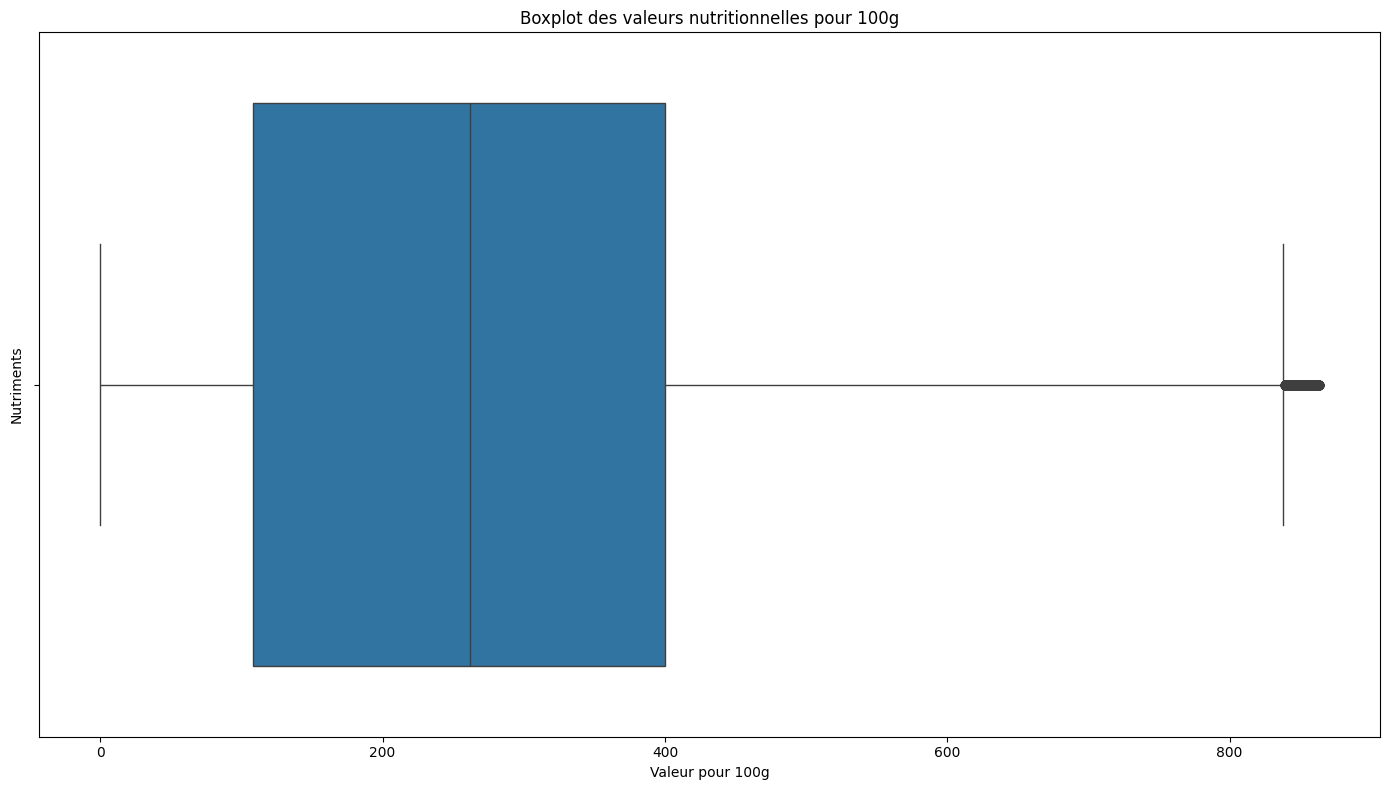

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=outliers_anthony['energy-kcal_100g'], orient='h')
plt.title('Boxplot des valeurs nutritionnelles pour 100g')
plt.xlabel('Valeur pour 100g')
plt.ylabel('Nutriments')

# Afficher le graphique
plt.tight_layout()
plt.show()

#### 2. Colonne nutrition

In [ ]:

outliers_100g = outliers_anthony

outliers_100g.loc[:, col_nutri] = outliers_100g[col_nutri].where((outliers_100g[col_nutri] >= 0) & (outliers_100g[col_nutri] <= 100))
outliers_100g = outliers_100g.dropna(subset=col_nutri)


Q1 = outliers_100g[col_nutri].quantile(0.25)
Q3 = outliers_100g[col_nutri].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_100g.loc[:, col_nutri] = outliers_100g[col_nutri].where((outliers_100g[col_nutri] >= lower_bound) & (outliers_100g[col_nutri] <= upper_bound))
outliers_100g = outliers_100g.dropna(subset=col_nutri)

outliers_100g


,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
7,779.0,18.00,10.8,0.0,0.0,4.4,3.6,2.30,2.30,0.1000,0.04000,0.0,0.0,0.000000
9,508.0,26.00,12.0,0.0,0.0,58.0,29.0,0.00,8.60,0.4700,0.18800,0.0,0.0,0.000000
11,630.0,7.00,0.6,0.0,0.0,14.0,4.0,1.50,7.00,0.7112,0.28448,0.0,0.0,9.548950
25,280.0,6.78,0.0,0.0,0.0,50.8,0.0,1.69,6.78,0.9470,0.37900,0.0,0.0,0.000000
32,751.0,8.50,4.8,0.0,0.0,20.9,4.0,0.00,3.70,0.7874,0.31496,0.0,0.0,15.455322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983020,87.0,1.70,1.1,0.0,0.0,7.9,4.4,0.00,10.00,0.4800,0.19200,0.0,0.0,0.000000
983022,55.0,0.10,0.1,0.0,0.0,4.1,3.1,0.00,9.40,0.1000,0.04000,0.0,0.0,2.375000
983026,125.0,7.50,6.5,0.0,0.0,13.0,9.9,0.50,1.00,0.1700,0.06800,0.0,0.0,0.000000
983030,350.0,1.20,0.3,0.0,0.0,70.5,3.2,3.50,12.50,0.0000,0.00000,0.0,0.0,0.000000


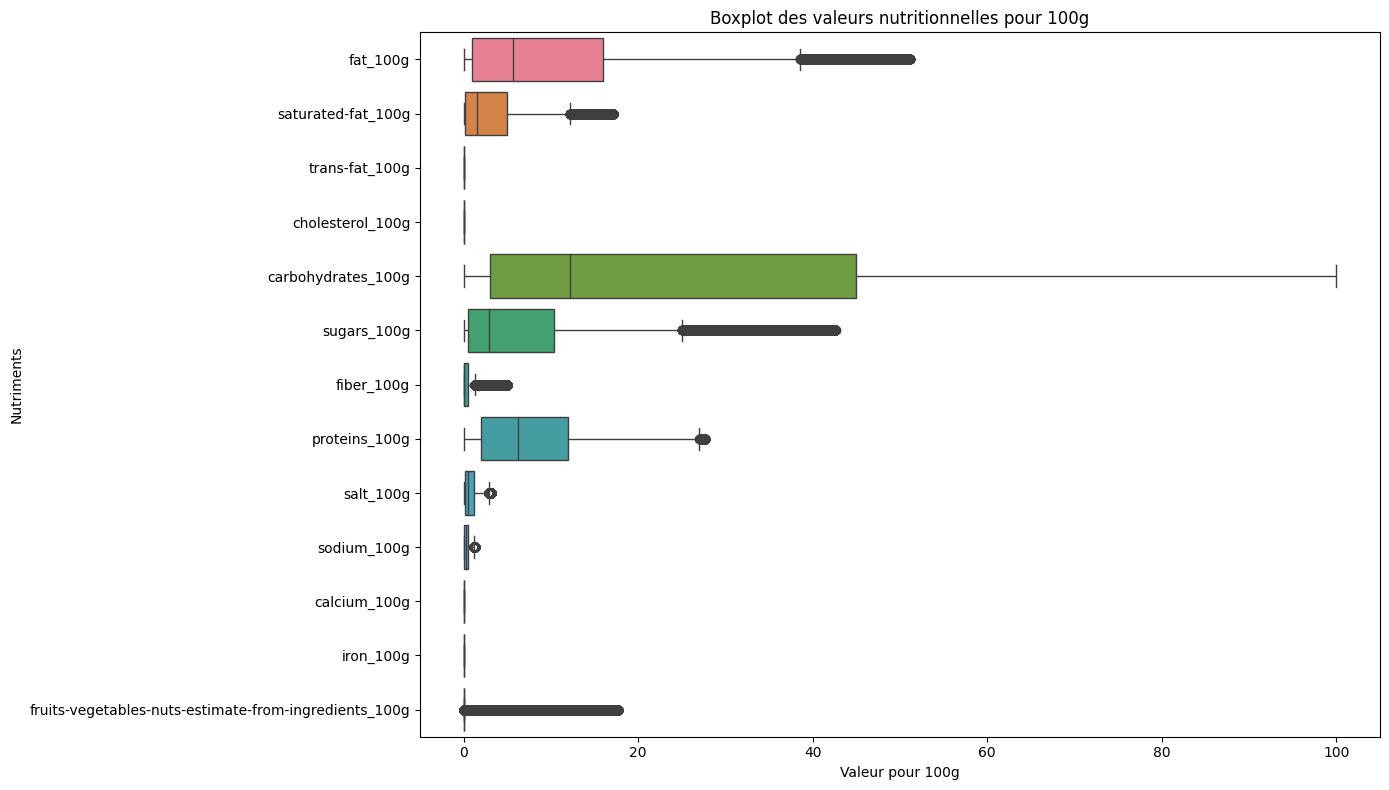

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=outliers_100g[col_nutri], orient='h')
plt.title('Boxplot des valeurs nutritionnelles pour 100g')
plt.xlabel('Valeur pour 100g')
plt.ylabel('Nutriments')

# Afficher le graphique
plt.tight_layout()
plt.show()

#### 3. Application des calcules valeur manquantes et aberrante

In [ ]:
df_output_clean = df_output


# VALEUR MANQUANTE

df_output_clean = df_output_clean.dropna(subset=['energy-kcal_100g'])
df_output_clean = df_output_clean.fillna(0)


# VALEUR ABERRANTE
df_output_clean.loc[:, col_nutri] = df_output_clean[col_nutri].where((df_output_clean[col_nutri] >= 0) & (df_output_clean[col_nutri] <= 100))
df_output_clean = df_output_clean.dropna(subset=col_nutri)


Q1 = df_output_clean[col_nutri].quantile(0.25)
Q3 = df_output_clean[col_nutri].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_output_clean.loc[:, col_nutri] = df_output_clean[col_nutri].where((df_output_clean[col_nutri] >= lower_bound) & (df_output_clean[col_nutri] <= upper_bound))
df_output_clean = df_output_clean.dropna(subset=col_nutri)



# 6. Sélection des colonnes pertinentes

## a. Colonnes pertinentes des valeurs explicatives

In [ ]:
df_output_clean[col_nutri].describe()

,fat_100g,saturated-fat_100g,trans-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,433187.000000,433187.000000,433187.0,433187.000000,433187.000000,433187.000000,433187.000000,433187.000000,433187.000000,433187.000000
mean,9.751825,3.487121,0.0,24.344511,7.577363,0.592830,7.716948,0.758555,0.303416,1.138531
std,10.646779,4.424512,0.0,25.694315,10.347686,1.177678,6.773265,0.765162,0.306063,3.244660
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.200000,0.0,3.000000,0.600000,0.000000,2.100000,0.100000,0.040000,0.000000
50%,5.800000,1.600000,0.0,12.700000,2.900000,0.000000,6.300000,0.560000,0.224000,0.000000
75%,16.000000,5.100000,0.0,46.000000,10.588235,0.500000,12.000000,1.240000,0.496000,0.000000
max,53.200000,17.700000,0.0,100.000000,43.400002,5.000000,27.600000,3.130000,1.252000,17.625000


On a remarquer qu'il y a des colonnes dont le max est à 0.
- transfat_100g
- cholesterol_100g
- calcium_100g
- iron_100g

In [ ]:
# Obtenir le maximum de chaque colonne
max_values = df[col_nutri].describe().loc['max']

# Filtrer pour obtenir les colonnes dont le max n'est pas 0
COL_NUTRI_USEFUL = max_values[max_values != 0].index.tolist()

COL_NUTRI_USEFUL

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

## b. Colonne pertinentes des valeurs affichages

In [ ]:
SELECTED_COLS = [
  "code",
  "url",
  "product_name",
  "quantity",
  "brands",
  "categories",
  "countries_en",
  "nutriscore_score",
  "nutriscore_grade",
  "image_url",
  "pnns_groups_1",
  "pnns_groups_2",
  'energy-kcal_100g'
  ]

# 7. Génération du fichier nettoyé

In [ ]:
COL_PERTINENTES = SELECTED_COLS + COL_NUTRI_USEFUL
COL_PERTINENTES

['code',
 'product_name',
 'quantity',
 'brands',
 'categories',
 'countries_en',
 'nutriscore_score',
 'nutriscore_grade',
 'image_url',
 'pnns_groups_1',
 'pnns_groups_2',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

On sélectionne les produits de la France uniquement d'après l'ennoncer de Babacar

In [ ]:
df_output_clean_2 = df_output_clean[df_output_clean["countries_en"].str.contains("France", na=False)]

On vérifie qu'il y a bien toutes les valeurs cibles

In [ ]:
df_output_clean_2["nutriscore_grade"].unique()

array(['a', 'c', 'b', 'd', 'e'], dtype=object)

In [ ]:
# Exporter en CSV avec un séparateur de tabulation (\t)
df_output_clean_2[COL_PERTINENTES].to_csv(OUTPUT_PATH, sep='\t', index=False)

# 8. Entrainement de données